In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

In [ ]:
# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.15.0


In [ ]:
train_dir = '/content/drive/MyDrive/PROYEK DATA MINING/NewExperimen/train'
test_dir = '/content/drive/MyDrive/PROYEK DATA MINING/NewExperimen/test'

In [ ]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Hanya rescale untuk data testing
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
# Menyiapkan generator data training dan testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 100 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [ ]:
# Membuat model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Menampilkan arsitektur model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
# Mengkompilasi model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
    epochs=110,
    validation_data=test_generator,
    validation_steps=max(1, test_generator.samples // test_generator.batch_size)
)

Epoch 1/110
3/3 [==============================] - 10s 3s/step - loss: 0.1975 - accuracy: 0.9412 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 2/110
3/3 [==============================] - 9s 3s/step - loss: 0.1631 - accuracy: 0.9583 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 3/110
3/3 [==============================] - 8s 2s/step - loss: 0.2711 - accuracy: 0.8854 - val_loss: 0.0536 - val_accuracy: 1.0000
Epoch 4/110
3/3 [==============================] - 9s 2s/step - loss: 0.1840 - accuracy: 0.9265 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 5/110
3/3 [==============================] - 10s 3s/step - loss: 0.1801 - accuracy: 0.9271 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 6/110
3/3 [==============================] - 8s 2s/step - loss: 0.3300 - accuracy: 0.8438 - val_loss: 0.0498 - val_accuracy: 1.0000
Epoch 7/110
3/3 [==============================] - 9s 3s/step - loss: 0.2553 - accuracy: 0.8971 - val_loss: 0.0724 - val_accuracy: 1.0000
Epoch 8/110
3/3 [===============

In [ ]:
# Save the model
model.save('/content/cnn_model_rempah.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_generator, steps=max(1, test_generator.samples // test_generator.batch_size))
print(f'Test accuracy: {test_acc:.4f}')

1/1 [==============================] - 1s 1s/step - loss: 0.0022 - accuracy: 1.0000
Test accuracy: 1.0000


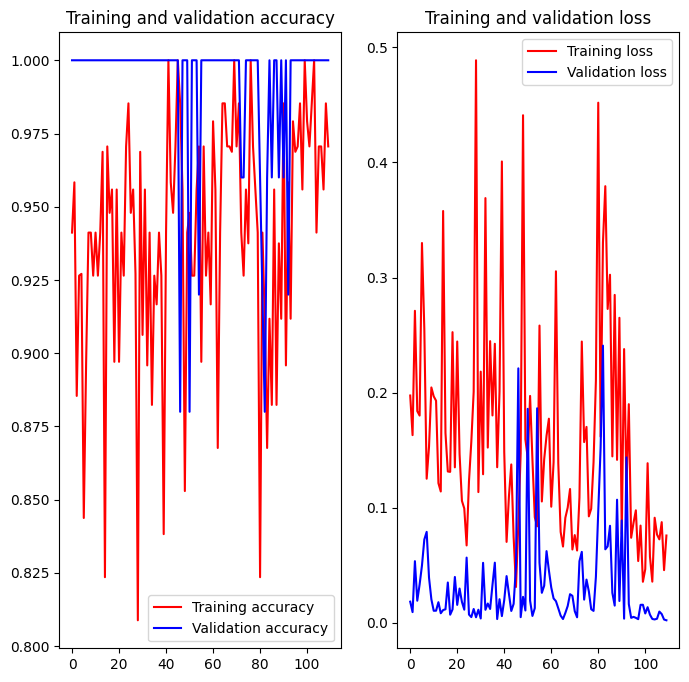

In [ ]:
#Plot Training History
import matplotlib.pyplot as plt
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history)

1/1 [==============================] - 0s 167ms/step


<ipython-input-35-4184dc12757b>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


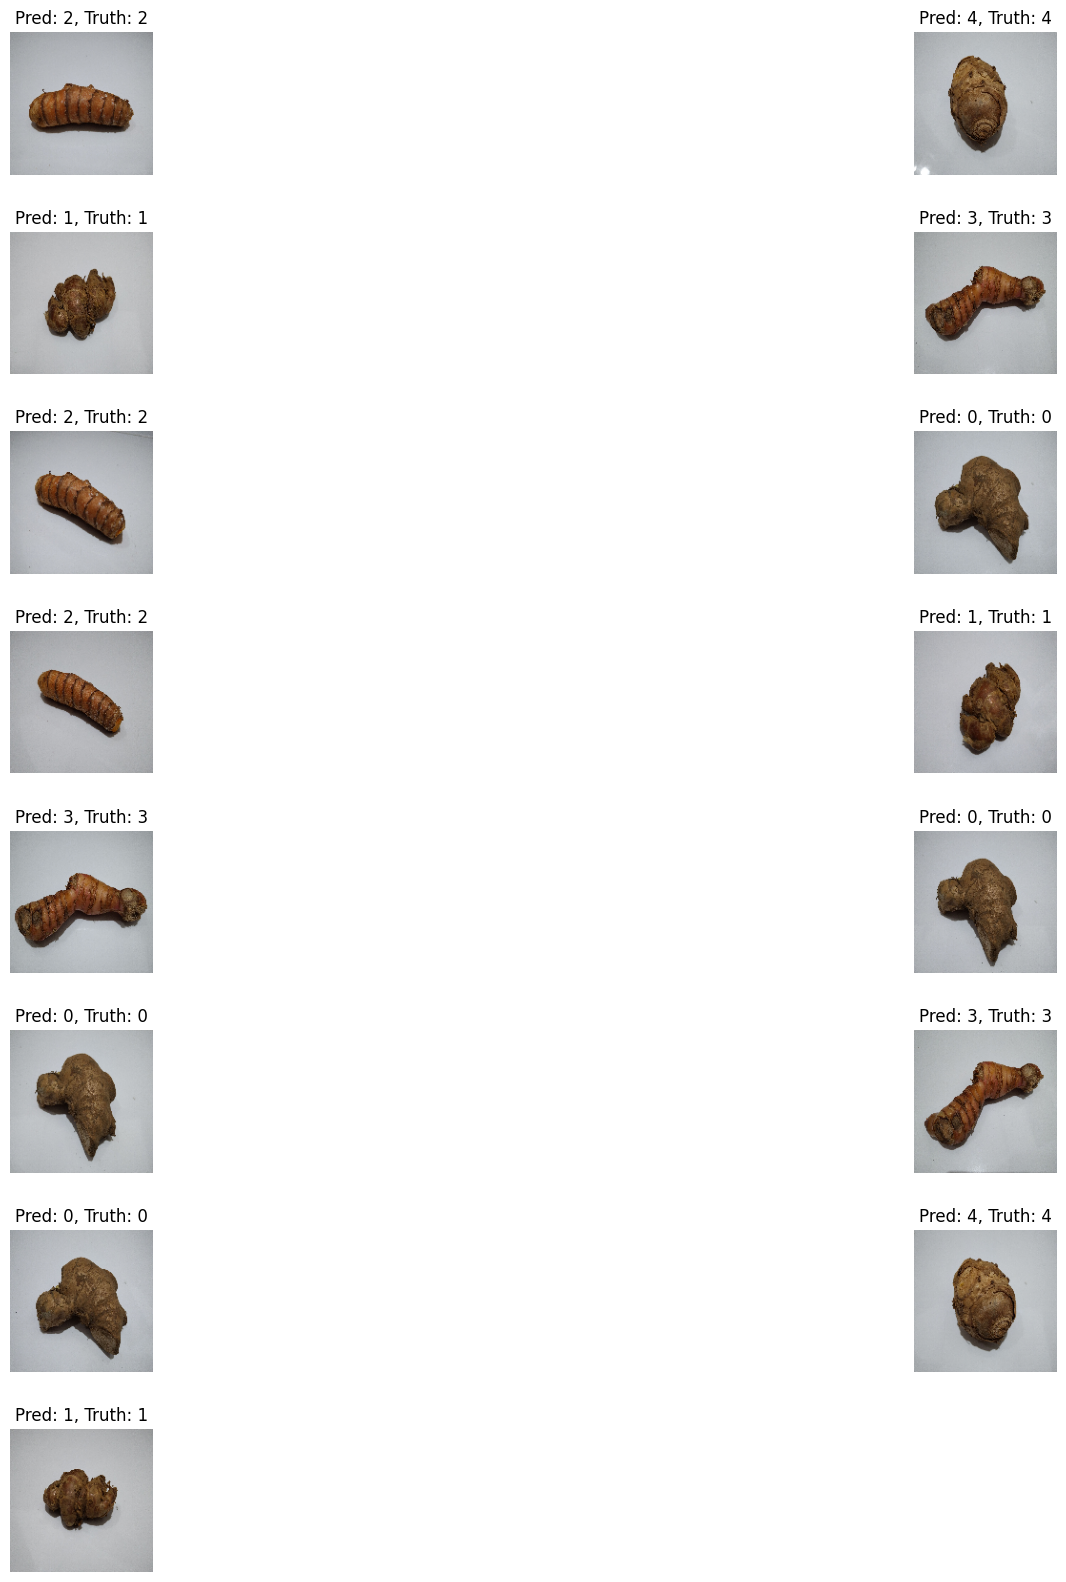

In [ ]:
import matplotlib.gridspec as gridspec

def plot_test_images(model, test_generator, num_images=10):
    # Reset the generator to make sure we start from the beginning
    test_generator.reset()

    # Get all images and labels from the test generator
    test_images = []
    test_labels = []

    for i in range(len(test_generator)):
        imgs, lbls = next(test_generator)
        test_images.extend(imgs)
        test_labels.extend(lbls)

    test_images = np.array(test_images)
    test_labels = np.array(test_labels)

    # Shuffle the images and labels together
    indices = np.arange(len(test_images))
    np.random.shuffle(indices)
    test_images = test_images[indices]
    test_labels = test_labels[indices]

    # Predict labels for the test images
    predictions = model.predict(test_images[:num_images])

    # Set figure size to accommodate more space
    cols = 2
    rows = (num_images + cols - 1) // cols
    plt.figure(figsize=(20, 20))

    # Use GridSpec for flexible layout
    gs = gridspec.GridSpec(rows, cols, wspace=0.4, hspace=0.4)

    for i in range(num_images):
        ax = plt.subplot(gs[i])
        ax.imshow(test_images[i])
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(test_labels[i])
        ax.set_title(f"Pred: {pred_label}, Truth: {true_label}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot test images
plot_test_images(model, test_generator, num_images=15)

1/1 [==============================] - 1s 1s/step


<Figure size 1000x1000 with 0 Axes>

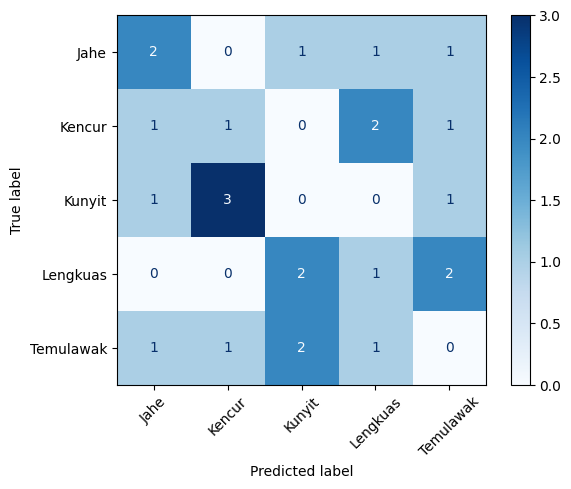

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Confusion Matrix
# Get true labels and predictions
test_labels = test_generator.classes
test_labels = test_labels[:len(test_generator.filenames)]  # Ensure the length matches

# Predict the labels for the test data
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 10))
cmd.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

Saving images.jpeg to images (1).jpeg
1/1 [==============================] - 0s 99ms/step


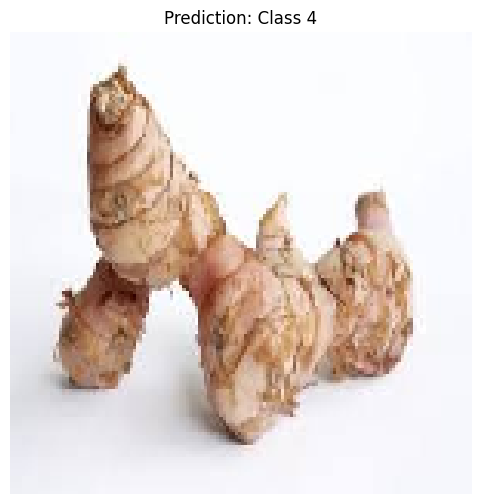

In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files

# Function to predict and display a single image uploaded via browser
def predict_uploaded_image(model):
    # Upload image file
    uploaded = files.upload()

    for img_name in uploaded.keys():
        # Load and preprocess the uploaded image
        img_path = img_name
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale to [0, 1]

        # Predict the class probabilities
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])

        # Prepare plot
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')

        # Print prediction
        plt.title(f"Prediction: Class {predicted_class}")
        plt.show()

# Example usage: Load your trained model
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('/content/cnn_model_rempah.h5')  # Path to your trained model

# Example usage: Predict an uploaded image
predict_uploaded_image(model)
